Imports

In [64]:
import pandas as pd

Read File

In [65]:
file_path='./data/CTG.xls'
df_data_clean = pd.read_excel(file_path,'Data')
df_raw = pd.read_excel(file_path,'Raw Data',skiprows=[1,2])

In [66]:
df_raw.columns.equals(df_data_clean.columns)

False

In [67]:
df_raw.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

Data Cleaning

In [68]:
df_raw.isnull().values.any() #faster than isna or sum

True

In [69]:
df_raw.columns[df_raw.isnull().any()].tolist()

['FileName',
 'Date',
 'SegFile',
 'b',
 'e',
 'LBE',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'DR',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'A',
 'B',
 'C',
 'D',
 'E',
 'AD',
 'DE',
 'LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']

In [70]:
df_raw['FileName']

0         Fmcs_1.txt
1         Fmcs_1.txt
2         Fmcs_1.txt
3         Fmcs_1.txt
4         Fmcs_2.txt
            ...     
2123    S8001045.dsp
2124    S8001045.dsp
2125             NaN
2126             NaN
2127             NaN
Name: FileName, Length: 2128, dtype: object

In [71]:
df_raw = df_raw.iloc[:-3,:]

In [72]:
df_raw['FileName'].isnull().any()

False

In [73]:
df_raw.isnull().values.any() #faster than isna or sum

False

Data analysis

In [114]:
measure_columns = ["b","e","LBE","LB","AC","FM","UC","ASTV","MSTV","ALTV","MLTV","DL","DS","DP","Width","Min","Max","Nmax","Nzeros","Mode","Mean","Median","Variance","Tendency"] # no DR
measure_columns_no_aggregates = ["b","e","LBE","LB","AC","FM","UC","ASTV","MSTV","ALTV","MLTV","DL","DS","DP"] # no DR
df_raw_measures = df_raw.loc[:,measure_columns]
df_raw_measures_no_aggregates = df_raw.loc[:,measure_columns_no_aggregates]

In [75]:
print(df_raw_measures_no_aggregates)

           b       e    LBE     LB   AC   FM    UC  ASTV  MSTV  ALTV  MLTV  \
0        5.0   632.0  132.0  132.0  4.0  0.0   4.0  17.0   2.1   0.0  10.4   
1      177.0   779.0  133.0  133.0  2.0  0.0   5.0  16.0   2.1   0.0  13.4   
2      411.0  1192.0  134.0  134.0  2.0  0.0   6.0  16.0   2.4   0.0  23.0   
3      533.0  1147.0  132.0  132.0  4.0  0.0   5.0  16.0   2.4   0.0  19.9   
4        0.0   953.0  134.0  134.0  1.0  0.0  10.0  26.0   5.9   0.0   0.0   
...      ...     ...    ...    ...  ...  ...   ...   ...   ...   ...   ...   
2120  2059.0  2867.0  140.0  140.0  0.0  0.0   6.0  79.0   0.2  25.0   7.2   
2121  1576.0  2867.0  140.0  140.0  1.0  0.0   9.0  78.0   0.4  22.0   7.1   
2122  1576.0  2596.0  140.0  140.0  1.0  0.0   7.0  79.0   0.4  20.0   6.1   
2123  1576.0  3049.0  140.0  140.0  1.0  0.0   9.0  78.0   0.4  27.0   7.0   
2124  2796.0  3415.0  142.0  142.0  1.0  1.0   5.0  74.0   0.4  36.0   5.0   

       DL   DS   DP   DR  
0     2.0  0.0  0.0  0.0  
1     2.0

In [76]:
(df_raw_measures_no_aggregates["DR"]==0).all()

True

In [77]:
df_raw_measures_no_aggregates.corr()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR
b,1.000000,0.945005,-0.020866,-0.020866,-0.038626,-0.133932,0.225278,-0.125929,0.040201,-0.109352,-0.100410,0.091591,0.063966,0.091609,NaN
e,0.945005,1.000000,-0.014913,-0.014913,0.071096,-0.119442,0.386322,-0.065412,0.043995,-0.103469,-0.108922,0.162924,0.068215,0.111789,NaN
LBE,-0.020866,-0.014913,1.000000,1.000000,-0.078498,-0.033444,-0.128646,0.306830,-0.280386,0.287120,-0.032768,-0.156390,-0.053577,-0.117358,NaN
LB,-0.020866,-0.014913,1.000000,1.000000,-0.078498,-0.033444,-0.128646,0.306830,-0.280386,0.287120,-0.032768,-0.156390,-0.053577,-0.117358,NaN
AC,-0.038626,0.071096,-0.078498,-0.078498,1.000000,0.053894,0.211749,-0.197574,0.191105,-0.344824,-0.129321,-0.011579,-0.039367,-0.110432,NaN
FM,-0.133932,-0.119442,-0.033444,-0.033444,0.053894,1.000000,-0.036758,-0.116386,0.138004,-0.072105,0.020942,0.076233,-0.010334,0.205318,NaN
UC,0.225278,0.386322,-0.128646,-0.128646,0.211749,-0.036758,1.000000,-0.078809,0.232255,-0.246707,-0.107281,0.339267,0.018378,0.152292,NaN
ASTV,-0.125929,-0.065412,0.306830,0.306830,-0.197574,-0.116386,-0.078809,1.000000,-0.430355,0.458727,-0.314620,-0.036615,0.034008,0.053900,NaN
MSTV,0.040201,0.043995,-0.280386,-0.280386,0.191105,0.138004,0.232255,-0.430355,1.000000,-0.469917,0.073469,0.516778,0.034112,0.287493,NaN
ALTV,-0.109352,-0.103469,0.287120,0.287120,-0.344824,-0.072105,-0.246707,0.458727,-0.469917,1.000000,-0.170414,-0.265993,-0.030745,-0.140013,NaN


Why is DR NaN?

In [78]:
corr_m = df_raw_measures_no_aggregates.corr().fillna(0) # DR is removed since p(K-W)=1

In [79]:
corr_m

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR
b,1.000000,0.945005,-0.020866,-0.020866,-0.038626,-0.133932,0.225278,-0.125929,0.040201,-0.109352,-0.100410,0.091591,0.063966,0.091609,0.0
e,0.945005,1.000000,-0.014913,-0.014913,0.071096,-0.119442,0.386322,-0.065412,0.043995,-0.103469,-0.108922,0.162924,0.068215,0.111789,0.0
LBE,-0.020866,-0.014913,1.000000,1.000000,-0.078498,-0.033444,-0.128646,0.306830,-0.280386,0.287120,-0.032768,-0.156390,-0.053577,-0.117358,0.0
LB,-0.020866,-0.014913,1.000000,1.000000,-0.078498,-0.033444,-0.128646,0.306830,-0.280386,0.287120,-0.032768,-0.156390,-0.053577,-0.117358,0.0
AC,-0.038626,0.071096,-0.078498,-0.078498,1.000000,0.053894,0.211749,-0.197574,0.191105,-0.344824,-0.129321,-0.011579,-0.039367,-0.110432,0.0
FM,-0.133932,-0.119442,-0.033444,-0.033444,0.053894,1.000000,-0.036758,-0.116386,0.138004,-0.072105,0.020942,0.076233,-0.010334,0.205318,0.0
UC,0.225278,0.386322,-0.128646,-0.128646,0.211749,-0.036758,1.000000,-0.078809,0.232255,-0.246707,-0.107281,0.339267,0.018378,0.152292,0.0
ASTV,-0.125929,-0.065412,0.306830,0.306830,-0.197574,-0.116386,-0.078809,1.000000,-0.430355,0.458727,-0.314620,-0.036615,0.034008,0.053900,0.0
MSTV,0.040201,0.043995,-0.280386,-0.280386,0.191105,0.138004,0.232255,-0.430355,1.000000,-0.469917,0.073469,0.516778,0.034112,0.287493,0.0
ALTV,-0.109352,-0.103469,0.287120,0.287120,-0.344824,-0.072105,-0.246707,0.458727,-0.469917,1.000000,-0.170414,-0.265993,-0.030745,-0.140013,0.0


In [80]:
numeric_df = df_raw_measures_no_aggregates.apply(pd.to_numeric, errors='coerce')
numeric_df.isnull().values.any()

False

# Mettere al fondo come next step: handle correlated features

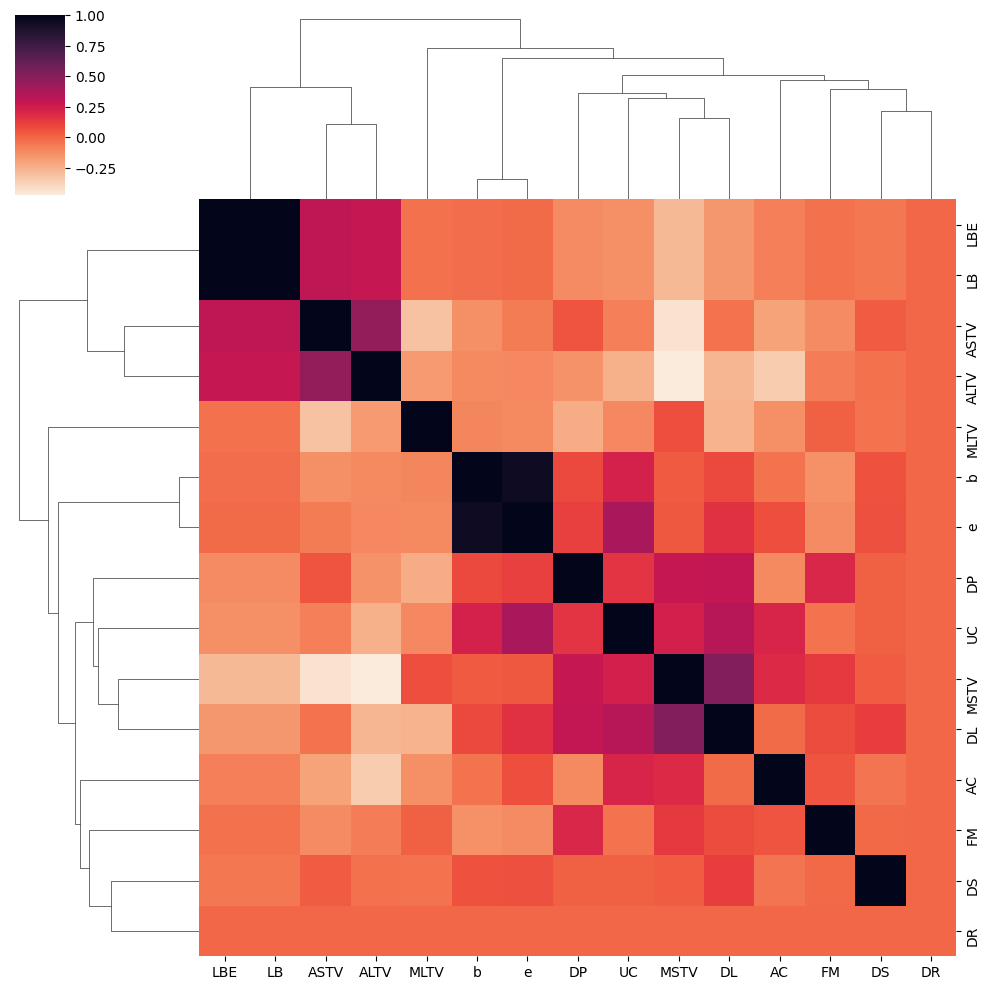

In [81]:
import seaborn as sns
sns_plot = sns.clustermap(corr_m, cmap="rocket_r")

In [ ]:
#DR will be dropped

In [82]:
measure_columns_no_aggregates = ["b","e","LBE","LB","AC","FM","UC","ASTV","MSTV","ALTV","MLTV","DL","DS","DP"]
df_raw_measures_no_aggregates = df_raw.loc[:,measure_columns_no_aggregates]

In [ ]:
target_col = [""]

In [84]:
import scipy as sp 

norm_df=sp.stats.zscore(df_raw_measures_no_aggregates)

<Axes: >

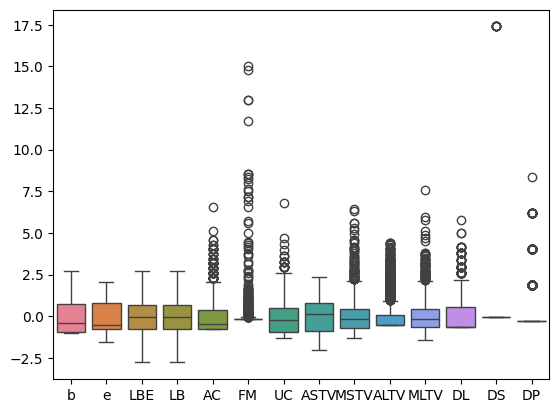

In [85]:
sns.boxplot(norm_df)

We note different outliers

In [113]:
df_raw_measures.columns

Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency'],
      dtype='object')

## Dataset preparation

In [224]:
measure_columns_tot = ["b","e","LBE","LB","AC","FM","UC","ASTV","MSTV","ALTV","MLTV","DL","DS","DP","Width","Min","Max","Nmax","Nzeros","Mode","Mean","Median","Variance","Tendency","NSP"] # no DR
df_raw_measures_tot = df_raw.loc[:,measure_columns_tot]

Oversample as unbalanced dataset. Warning in using artificial data for patients. 

In [247]:
from imblearn.over_sampling import SMOTE

In [225]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats

le = LabelEncoder()
X_cut=df_raw_measures_tot
X=X_cut.loc[:,measure_columns]
y = X_cut.loc[:,'NSP'].astype('uint8')
y_encode = le.fit_transform(y)

In [249]:
oversample=SMOTE()
X_ov,y_ov = oversample.fit_resample(X,y_encode)

In [253]:
len(y_ov)

4440

In [258]:
lbls=[f"{x*100:.2f}%" for x in np.histogram(y_ov,bins=3)[0]/np.sum(np.histogram(y_ov)[0])]

[Text(0, 0, '33.33%'), Text(0, 0, '33.33%'), Text(0, 0, '33.33%')]

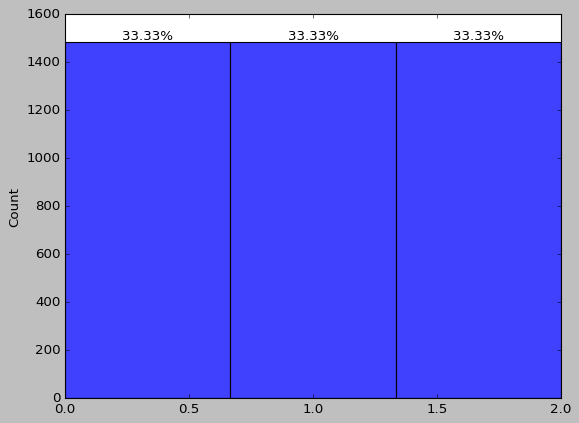

In [259]:
ax=sns.histplot(y_ov,bins=3)
ax.bar_label(ax.containers[0],labels=lbls)

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## ML Algorithms

Imports

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('classic');
# Sklearn >>>>
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
#from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from lightgbm import LGBMClassifier

Il set di algoritmi scelti corrisponde alle seguenti valutazioni: tra i classifiers, i più famosi sono gli alberi, le svm e i mlp. Abbiamo pochi dati e poche features, non c'è bisogno di un sistema complesso che potrebbe non avere abbastanza dati a disposizione, nè pca perchè ci sono poche features e non c'è bisogno di ottimizzazione computazionale. 
Proviamo gaussiannb,alberi (rf), svm, xgb e lgbmclassifier. Da esperienza personale i supervised con xgboost han sempre prodotto risultati migliori, anche se di poco. l' lgbm è avvalorato come un buon algoritmo. 

For example, for RBF kernel (most standard kernel function)
depends on two parameters: Gamma and C
• Best practice for setting the parameters’ values:
– Define a grid of (Cmin : Cstep: Cmax, gammamin: gammastep: gammamax)
pairs, with default C,gamma in the center and large step values
– Compute crossvalidation accuracy per each pair of parameters values,
chose the best ones
– Define a finer grid around the optimal pair
– Go on until convergence

In [262]:
#requested classifiers
classif=[('gnb',GaussianNB()),('svm',SVC()),('rf',RandomForestClassifier()),('xgb',xgb.XGBClassifier()),('lgbm',LGBMClassifier())]

# classif_names=[x[0] for x in classif] #for roc curve

#build one pipeline for each classifier
pipes = [Pipeline([
    ('scaling', StandardScaler(with_mean=True)),
    i]) for i in classif]

# Parameters of pipelines can be set using ‘__’ separated parameter names:
params_grid = [{},
    {'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001], 'svm__kernel': ['rbf']},
    {'rf__n_estimators':[10,100,200]},
    {'xgb__tree_method':['hist'],'xgb__n_estimators':[10,100,200],'xgb__learning_rate':[0.1,0.01]}, 
    {'lgbm__learning_rate':[0.1,0.01],'lgbm__subsample_for_bin':[1000,2000,200000],'lgbm__objective':['multiclass']}            
    ]

for i,(pipe,param) in enumerate(zip(pipes,params_grid)):
    group=KFold(n_splits=3)
    
    #search = RandomizedSearchCV(pipe, param, n_jobs=-1,cv=group) #jobs=-1 --> use all processors. cv=apply the groupKfold
    search = GridSearchCV(pipe, param, n_jobs=-1,cv=group)
    
    # here i am going to fit all:

    search.fit(X_train, y_train) 

    best_estimator2=search.best_estimator_.fit(X_train,y_train)

    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

    # fig, ax = plt.subplots(1, 1)
    # plot_roc_curve(best_estimator2, 
    #                         X_test,
    #                         y2_test, 
    #                         ax=ax,
    #                         name=classif_names[i]);


Best parameter (CV score=0.760):
{}
Best parameter (CV score=0.968):
{'svm__C': 1000, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Best parameter (CV score=0.973):
{'rf__n_estimators': 200}
Best parameter (CV score=0.979):
{'xgb__learning_rate': 0.1, 'xgb__n_estimators': 200, 'xgb__tree_method': 'hist'}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5662
[LightGBM] [Info] Number of data points in the train set: 3019, number of used features: 23
[LightGBM] [Info] Start training from score -1.102928
[LightGBM] [Info] Start training from score -1.096957
[LightGBM] [Info] Start training from score -1.095966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5662
[LightGBM] [Info] Number of data points in the trai

In [263]:
y_pred=best_estimator2.predict(X_test)

In [264]:
y_score=best_estimator2.predict_proba(X_test)

In [265]:
y_score

array([[1.74285932e-06, 1.72361668e-06, 9.99996534e-01],
       [9.99997211e-01, 2.00007872e-06, 7.88428938e-07],
       [4.84343222e-01, 5.12154095e-01, 3.50268254e-03],
       ...,
       [9.99966655e-01, 3.10849518e-05, 2.26010478e-06],
       [1.49849004e-06, 3.26098845e-06, 9.99995241e-01],
       [1.11327926e-05, 9.99982807e-01, 6.06000564e-06]])

In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       217
           1       0.95      1.00      0.97       222
           2       1.00      1.00      1.00       227

    accuracy                           0.98       666
   macro avg       0.98      0.98      0.98       666
weighted avg       0.98      0.98      0.98       666



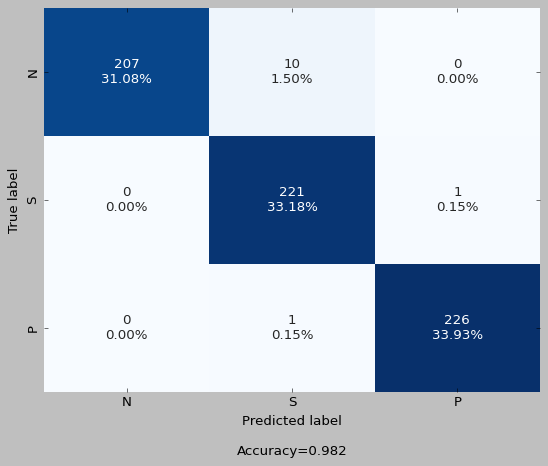

In [268]:
from utils import plot_confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix.make_confusion_matrix(cm,categories=["N","S","P"],cbar=False)

In [ ]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)


In [ ]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

In [ ]:


fig, ax = plt.subplots(figsize=(6, 6))
n_classes=len(y_test)
#colors = cycle(["aqua", "darkorange", "cornflowerblue"])
colors = ["aqua", "darkorange", "cornflowerblue"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [160]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_pred)

ValueError: The target y is not binary. Got multiclass type of target.

In [139]:
fi=best_estimator2.steps[1][1].feature_importances_

In [144]:
sns.barplot(np.arange(1,len(fi)+1),fi)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [148]:
feat_importances = pd.Series(fi, index=X.columns)

<Axes: >

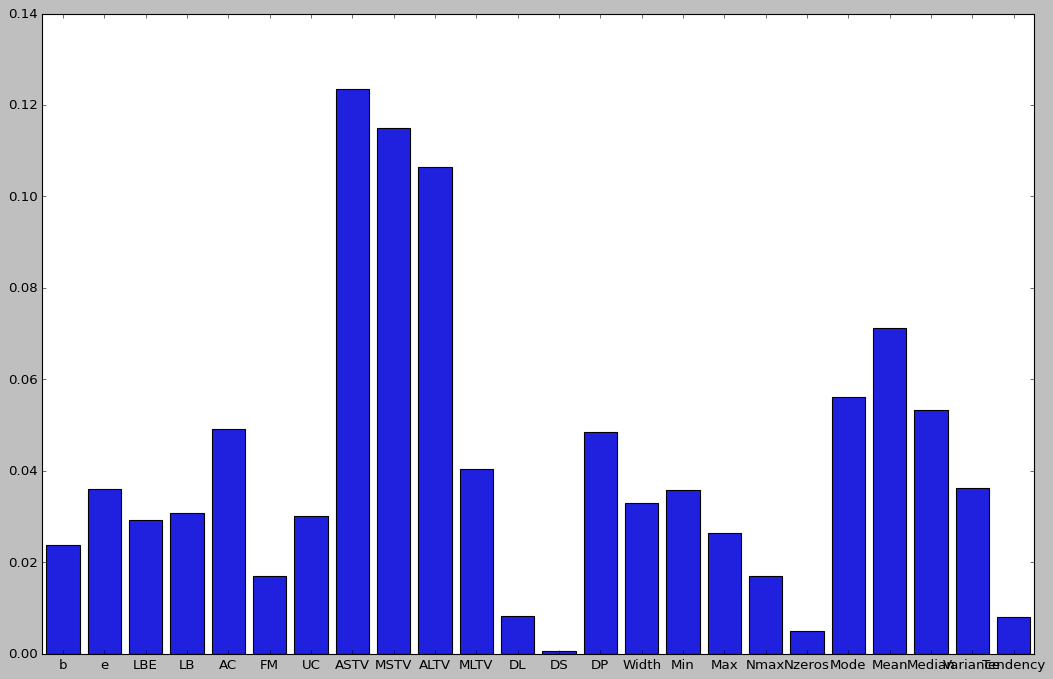

In [158]:
fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(feat_importances,ax=ax)

In [213]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])


[0]	validation_0-mlogloss:0.76938
[1]	validation_0-mlogloss:0.57948
[2]	validation_0-mlogloss:0.45969
[3]	validation_0-mlogloss:0.37454


[4]	validation_0-mlogloss:0.31132
[5]	validation_0-mlogloss:0.26730
[6]	validation_0-mlogloss:0.23731
[7]	validation_0-mlogloss:0.21375
[8]	validation_0-mlogloss:0.19545
[9]	validation_0-mlogloss:0.17944
[10]	validation_0-mlogloss:0.16887
[11]	validation_0-mlogloss:0.16063
[12]	validation_0-mlogloss:0.15394
[13]	validation_0-mlogloss:0.14799
[14]	validation_0-mlogloss:0.14399
[15]	validation_0-mlogloss:0.14158
[16]	validation_0-mlogloss:0.14082
[17]	validation_0-mlogloss:0.13850
[18]	validation_0-mlogloss:0.13681
[19]	validation_0-mlogloss:0.13662
[20]	validation_0-mlogloss:0.13584
[21]	validation_0-mlogloss:0.13567
[22]	validation_0-mlogloss:0.13610
[23]	validation_0-mlogloss:0.13462
[24]	validation_0-mlogloss:0.13447
[25]	validation_0-mlogloss:0.13434
[26]	validation_0-mlogloss:0.13422
[27]	validation_0-mlogloss:0.13524


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

E' un problema di classificazione, multiclass: "each sample is assigned to one and only one label"

Ragionamento: è un piccolo dataset, ha un numero di features non eccessivo => dimensionality reduction vale la pena? 

E' un piccolo numero di informazioni => no reti neurali, capire se il MLPclassifier va bene ma al limite. SVC?  => Per mia esperienza, decision trees sempre dato risultati ottimi: provo DT, RF, XGB e LightGBM.

Analisi risultati. Sembra essere efficace l'uso del ML => performance, spiega tp e fn , Roc ecc. Feature explanations, quale impatti di più. Sarebbe carino un client in cui mettendo valori ti predice la classe (E CON QUALE CONFIDENZA). 

Cosa hai imparato del problema a partire dal modello: papers, ecc. 

In [ ]:
# itera su algoritmi, kfold, hyperparam search
 

In [103]:
y_pred=clf.predict(X_test)

In [107]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))#, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       414
           1       0.90      0.84      0.87        74
           2       0.95      0.86      0.90        44

    accuracy                           0.95       532
   macro avg       0.94      0.90      0.92       532
weighted avg       0.95      0.95      0.95       532



In [110]:
metrics.plot_roc_curve(clf, y_pred, y_test) 

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

OP: balancing classes, PCA? outliers #X_cut=X_cut[(np.abs(stats.zscore(X_cut)) < 3).all(axis=1)]
